# Dependencies

Those of you new to jupyter notebooks:
Either click the >| Run button or Shift+Enter to step through each cell, or the >> button to restart and run all cells

In [1]:
# If you don't have graphviz installed, the following two commands should take care of it.
# Just uncomment them and run

#!conda install -y pygraphviz
#!pip install graphviz

In [2]:
from sklearn.datasets import load_iris
from IPython.display import display
from sklearn import tree, model_selection
import numpy as np
import graphviz as gv

import matplotlib.pyplot as plt
%matplotlib inline

random_state = 42 # For convenience and reproducibility in results. Don't do this in production models
np.random.seed(random_state)

# Load the Iris dataset from sklearn

In [3]:
iris=load_iris()

## Extract the data, target classes and features from the iris dataset

In [4]:
data, feature_names = iris.data, iris.feature_names
target, target_names = iris.target, iris.target_names

# The Iris dataset

The [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) consists of 150 samples equally distributed over three classes of the iris flower, namely 'Iris Setosa', 'Iris Versicolor' and 'Iris Virginica'.

The samples consist of four continunous features measured on real-world samples, as listed below:
1. Sepal Length (cm)
2. Sepal Width (cm)
3. Petal Length (cm)
4. Petal Width (cm)

For the non-botanically inclined - The petals are each individual leaf on the flower when in bloom. The sepals of the flower are the green leafy things by the foot of the flower near the stem protecting the flower petals.

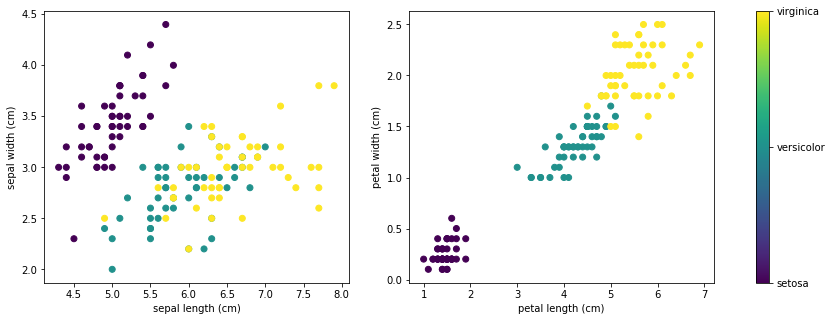

In [5]:
# Plotting code for the scatter plots
features = [(0, 1), (2, 3)] # Sepals and petals

# create a subplot with 1 row and as many columns as we have comparisons
fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(15,5))

for i, feature in enumerate(features):
    x, y = feature

    # Create a scatter plot in the i-th subplot
    scatter = axes[i].scatter(data[:, x], data[:, y], c=target)
    axes[i].set(xlabel=feature_names[x], ylabel=feature_names[y])


# A function to translate the target indices to string names for the color bar
formatter = plt.FuncFormatter(lambda s, *args: target_names[s])
fig.colorbar(scatter, ax=axes, ticks=[0, 1, 2], format=formatter)

plt.show()

Above is a quick scatterplot over the features so we can see how the data points are distributed amongst each other.

## Hyperparameters

In [6]:
# Determines the function used for deciding how to split the data at each branch in the tree
split_criterion = 'entropy' # “gini” for the Gini impurity and “entropy” for the information gain.

# Determines the maximum depth of the tree
max_depth = 20

# Determines the size of the test data set
test_size = 0.5 # 0.5 is 50%

# Shuffling the data can help against a biased training set
shuffle_dataset = False

# Will ensure there's a (roughly) equal ratio of the classes in the training and test split. 
stratify_dataset = None # Can only be set to "target" if shuffle is True, otherwise None
#stratify_dataset = target

## Split the dataset into a holdout and training set

We could do this manually, but here we're using sklearn to automatically split our data matrix and target vector for us in a sensible way.

In [7]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data, target, test_size=test_size, random_state=random_state, shuffle=shuffle_dataset, stratify=stratify_dataset)

print("Training data classes: \n", y_train)
print("Test data classes: \n", y_test)


Training data classes: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]
Test data classes: 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]


## Fit a Decision Tree classifier

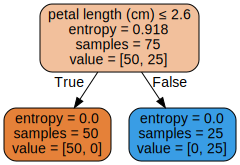

In [8]:
dtc = tree.DecisionTreeClassifier(criterion=split_criterion, max_depth=max_depth)
dtc = dtc.fit(X_train, y_train)

# Render a tree using graphviz
out = tree.export_graphviz(dtc, out_file=None, feature_names=feature_names, filled=True, rounded=True,
                         special_characters=True)

graph=gv.Source(out)
display(graph)

## Calculate the Accuracy of the training set

In [9]:
y_est_train = dtc.predict(X_train).T
training_error = np.sum(y_est_train != y_train) / len(y_train)
print("Accuracy of the Decision Tree classifier on the training set: {:.2f}%".format(100 * (1 - training_error)))

Accuracy of the Decision Tree classifier on the training set: 100.00%


## Calculate the Accuracy of the testset

In [10]:
y_est_test = dtc.predict(X_test).T
generalization_error = np.sum(y_est_test != y_test) / len(y_test)
print("Accuracy of the Decision Tree classifier on the test set: {:.2f}%".format(100 * (1 - generalization_error)))

Accuracy of the Decision Tree classifier on the test set: 33.33%


# Plot a confusion matrix

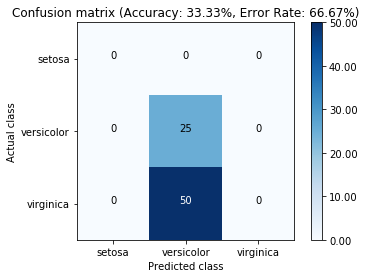

In [11]:
from sklearn.metrics import confusion_matrix

classes = len(target_names)

# Build a confusion matrix from the test set and the model results
cm = confusion_matrix(y_test, y_est_test, labels=range(classes));

# Calculate accuracy for the plot title
accuracy = 100*cm.diagonal().sum()/cm.sum()
error_rate = 100-accuracy;


# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues, interpolation='None');
plt.colorbar(format='%.2f')
plt.xticks(range(classes), labels=target_names)
plt.yticks(range(classes), labels=target_names)

plt.xlabel('Predicted class')
plt.ylabel('Actual class')
plt.title('Confusion matrix (Accuracy: {:.2f}%, Error Rate: {:.2f}%)'.format(accuracy, error_rate))
plt.plot()



# Fill the plot with the corresponding values
threshold = cm.max() / 2.0 # Threshold for using white or black text
for x in range(classes):
    for y in range(classes):
        plt.text(y, x, format(cm[x, y], 'd'),
             horizontalalignment="center",
             color="white" if cm[x, y] > threshold else "black") # Some pretty printing to make it more legible

# Exercise

1. Run the code and read through it to get a feel for what it does
    1. Reflect: Why is the accuracy on the test data so bad compared to the training data?
    1. Take a look at the hyper parameters. What's the simplest change you can make to improve the test accuracy?
1. Play with the hyper parameters and try to improve your test score.
    - Remember to take notes of your configurations and their results.
    - Reflect on the results. What classes does it have difficulty with? Does it have enough data to learn from? Is there enough test data for you to say anything meaningful about how well it generalizes?
    
What is the best test accuracy you're able to get?

# Hints

1. Hints for exercise 1
    1. The confusion matrix may help you discover why.
    1. Is the data distributed well enough between training and testing?
1. Hints for exercise 2
    - Try reducing the tree complexity to avoid it learning the training data exactly. 
    - Try out stratification (balancing the training and test set distributions)
    - Play around with different test/training splits. Ensure you have enough samples in your test set to validate on!
    - Try different split criterions